# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('GermanCredit.xlsx')

In [6]:
df.shape

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


# 2. Check how many records do we have


In [8]:
df.shape[0]

1000

# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:xlabel='CreditAmount', ylabel='Count'>

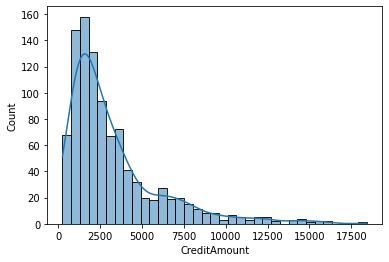

In [10]:
sns.histplot(data=df, x = 'CreditAmount',kde=True)

In [11]:
# The histogram looks left skewed

# 3b. Create creditability dataframe

In [19]:
cr = df.loc[:,['Creditability']]

In [21]:
cr.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [32]:
# I don't see how concatenating makes sense here

In [29]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

In [33]:
# I don't know what Creditworthiness plot is so here is a bar plot

<AxesSubplot:>

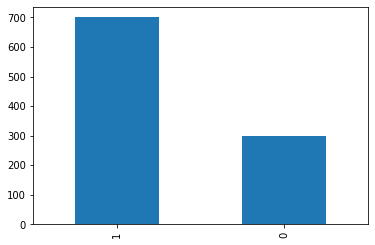

In [34]:
df['Creditability'].value_counts().plot(kind='bar')

# 6. Prepare input data for the model

In [37]:
X = df.drop(columns='Creditability')
X = stats.zscore(X)
y = df['Creditability']

In [39]:
from sklearn.model_selection import train_test_split
xtrian,xtest,ytrain,ytest = train_test_split(X,y,test_size= 0.20,random_state=10)

In [40]:
xtrian.shape,xtest.shape,ytrain.shape,ytest.shape

((800, 2), (200, 2), (800,), (200,))

# 7. Fit logistic regression model

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression().fit(xtrian,ytrain)
ypred = lr.predict(xtest)

# 8. Test accuracy calculation

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(ytest,ypred)

0.675

# 9. Build a confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(ytest,ypred)

array([[ 11,  56],
       [  9, 124]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

<AxesSubplot:xlabel='0'>

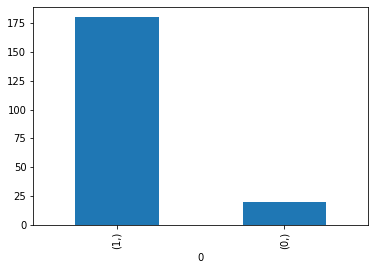

In [53]:
pd.DataFrame(ypred).value_counts().plot(kind='bar')
# The output is not probability since sklearn module is used 

Optimization terminated successfully.
         Current function value: 0.669074
         Iterations 5


<AxesSubplot:ylabel='Density'>

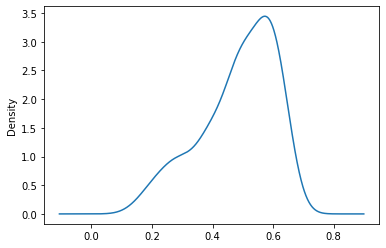

In [64]:
# For probability Distribution
import  statsmodels.api as sm
sm.Logit(ytrain,xtrian).fit().predict(xtest).plot(kind='kde')